# REGRESSÃO LINEAR PARA PREVISÃO DE VALORES DE CASAS

Sobre o conjunto de dados

Cada registro no banco de dados descreve um subúrbio ou cidade de Boston. Os dados foram extraídos da Boston Standard Metropolitan Statistical Area (SMSA) em 1970. Os atributos são definidos da seguinte forma (retirados do UCI Machine Learning Repository1):

- CRIM: taxa de criminalidade per capita por cidade
- ZN: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.
- INDUS: proporção de hectares de negócios não varejistas por cidade
- CHAS: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
- NOX: concentração de óxidos nítricos (partes por 10 milhões)
- RM: número médio de quartos por habitação
- IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS: distâncias ponderadas para cinco centros de emprego de Boston
- RAD: índice de acessibilidade às rodovias radiais
- IMPOSTO: valor total do imposto predial por US 10.000
- MEDV: Valor médio de residências ocupadas pelo proprietário em US 1.000

Fonte de dados e informações:
    
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

# Importando as bibliotécas necessárias

Nosso arquivo em CSV será importado para uma estrutura DataFrame utilizando a biblioteca Pandas para manipular e análisar os dados.

In [1]:
import numpy as np
import pandas as pd 
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import sklearn.metrics

## Lendo o arquivo CSV e nomeando as colunas 

O código define os nomes das colunas de um conjunto de dados em uma lista chamada 'column_names' e, em seguida, lê um arquivo CSV chamado 'housing.csv' usando a função 'read_csv()' da biblioteca pandas. A função usa os nomes de coluna definidos anteriormente e armazena os dados em um objeto pandas DataFrame chamado 'dataset'.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

## Visualizando o shape, as primeiras e ultimas 5 linhas do dataset com 'display'

In [3]:
display(dataset)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Visualizando informações básicas do dataset, incluindo o número de entradas, o número de colunas, os nomes das colunas, os tipos de dados em cada coluna e o número de valores não nulos em cada coluna.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Verificando se há algum valor nulo

In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Dado que não há valores ausentes nem problemas detectados em nosso conjunto de dados, não será preciso gastar muito tempo na limpeza dos dados. No entanto, é essencial ter em mente que a fase de limpeza e preparação dos dados pode ser bastante trabalhosa para um cientista de dados.

# Heatmap

O Heatmap é frequentemente usado para visualizar a relação entre duas ou mais variáveis em um conjunto de dados. É uma ferramenta útil para identificar padrões e tendências nos dados, tornando mais fácil para os usuários identificar relacionamentos e insights importantes

<AxesSubplot:>

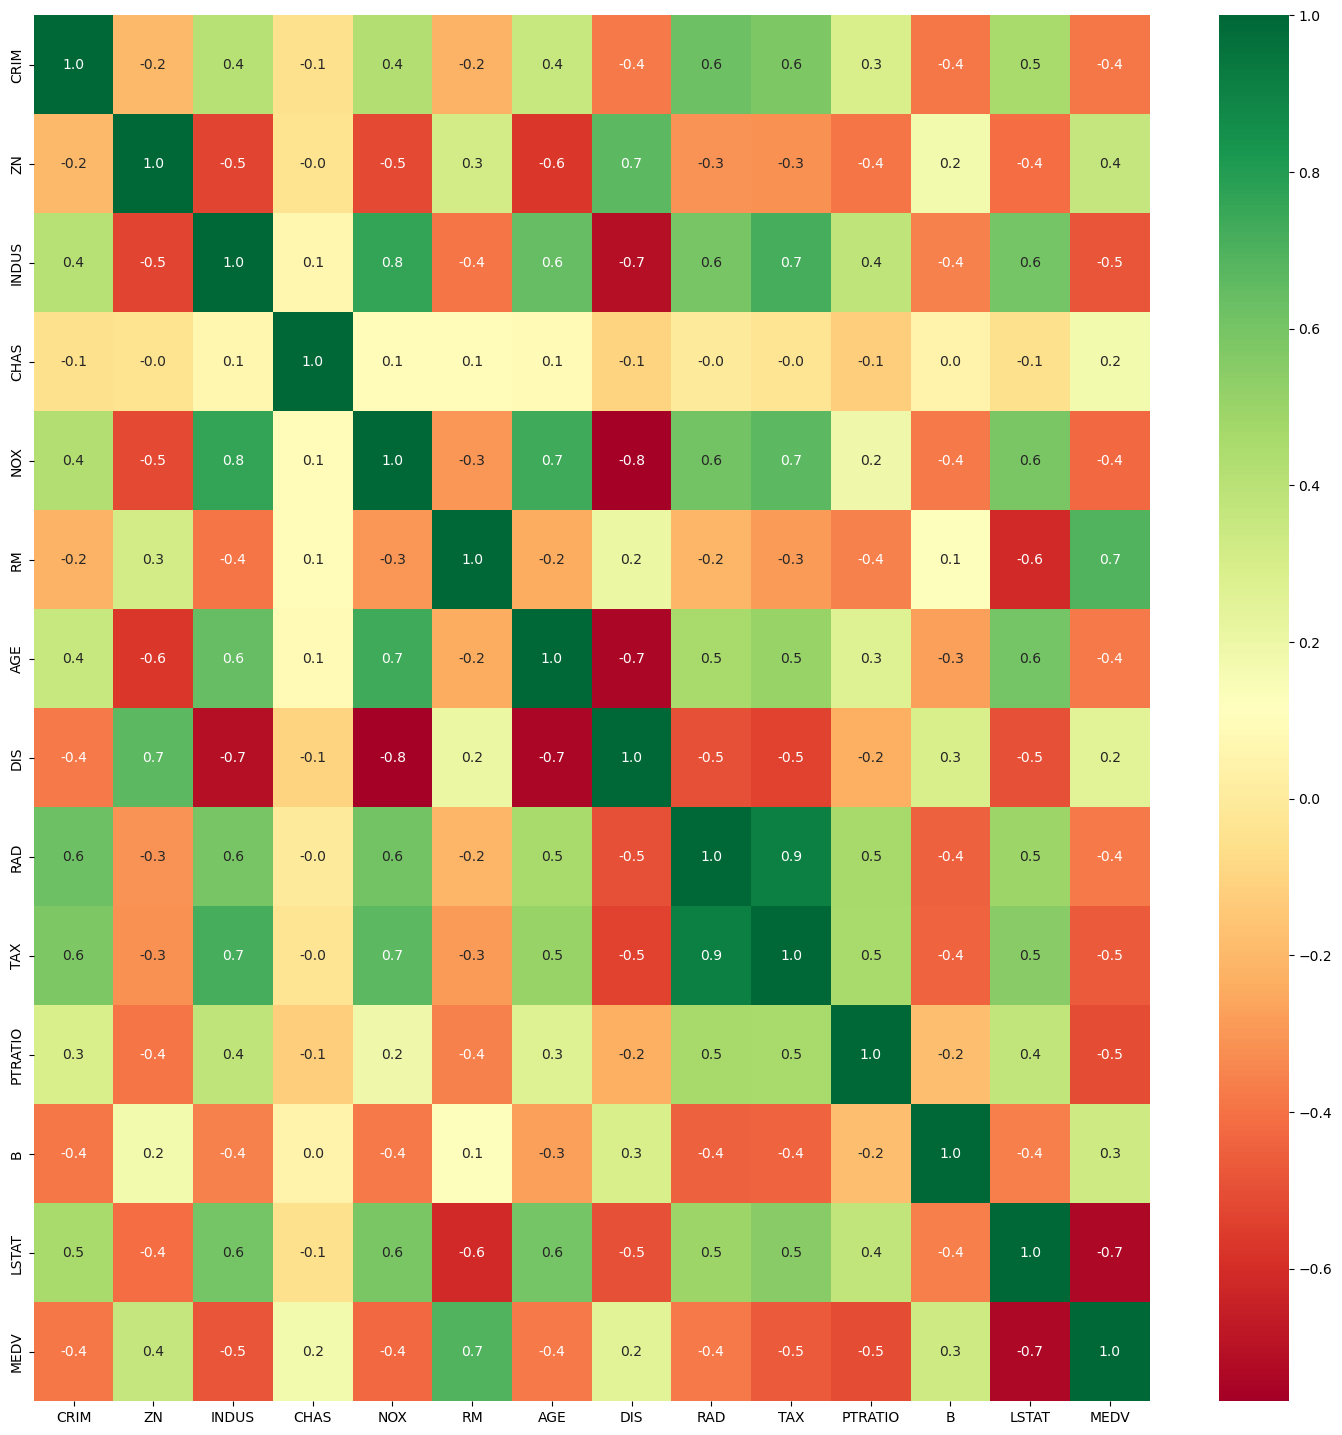

In [6]:
# Mostrar mapa de calor 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset.corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

In [7]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
X = dataset.iloc[:, 5].values #coluna RM
y = dataset.iloc[:, 13].values #coluna MEDV
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [8]:
X = X.reshape(-1, 1)

A linha de código "X = X.reshape(-1, 1)" é usada para alterar a forma do array X. O parâmetro "-1" indica que o numpy deve inferir o número correto de linhas com base no número de colunas e no tamanho do array original. Já o "1" indica que a nova matriz deve ter apenas uma coluna, o que é útil em várias situações, como quando se deseja transformar um vetor linha em um vetor coluna

In [9]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

Essas linhas de código criam um objeto de modelo de regressão linear chamado "modelo" usando a classe LinearRegression() e, em seguida, ajustam o modelo aos dados de entrada (X) e aos valores de saída correspondentes (y) usando o método fit().

In [10]:
#Interceptação
modelo.intercept_

-34.67062077643857

O código "modelo.intercept_" retorna o valor do coeficiente linear (também conhecido como intercepto ou viés) do modelo de regressão linear "modelo". Esse valor representa o ponto em que a linha de regressão intercepta o eixo vertical (ou seja, o valor previsto da variável dependente quando todas as variáveis independentes são iguais a zero).

In [11]:
#inclinação
modelo.coef_

array([9.10210898])

O código "modelo.coef_" retorna um array contendo os coeficientes de regressão (ou pesos) aprendidos pelo modelo de regressão linear "modelo"

In [12]:
#score R^2
modelo.score(X, y)

0.48352545599133423

O código "modelo.score(X, y)" retorna o coeficiente de determinação R² do modelo de regressão linear "modelo". O coeficiente de determinação R² é uma medida estatística que indica o quanto da variação da variável dependente (y) pode ser explicada pelas variáveis independentes (X) incluídas no modelo.

In [13]:
# Geração das previsões
previsoes = modelo.predict(X)
previsoes

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [14]:
# Criação do modelo, utilizando a biblioteca statsmodel 
#podemos ver r ajustadodo r2
modelo_ajustado = sm.ols(formula = 'MEDV ~ RM', data = dataset)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.49e-74
Time:                        00:58:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Os resultados mostra uma regressão linear entre a variável dependente "MEDV" e a variável independente "RM". O modelo ajustado tem um R-quadrado de 0,516, o que significa que 51,6% da variabilidade na variável dependente pode ser explicada pela variável independente. A estatística F é significativa (Prob (F-statistic) <0,05), o que sugere que o modelo como um todo é significativo. O coeficiente para a interceptação é -39,5869 e o coeficiente para RM é 9,8723. Ambos são significativos (P>|t| <0,05), o que significa que a variável independente tem um efeito significativo na variável dependente. Em resumo, esses resultados mostram que há uma relação positiva entre as variáveis "RM" e "MEDV".

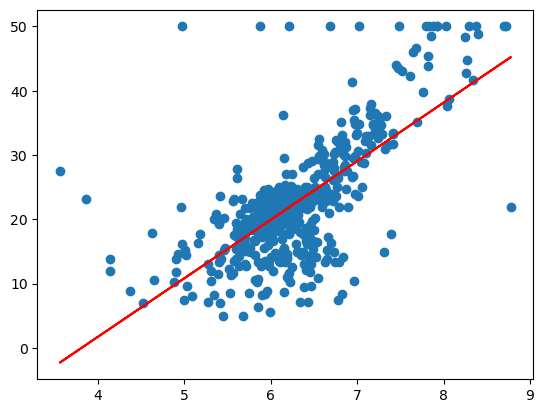

In [15]:
# Visualização dos resultados
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

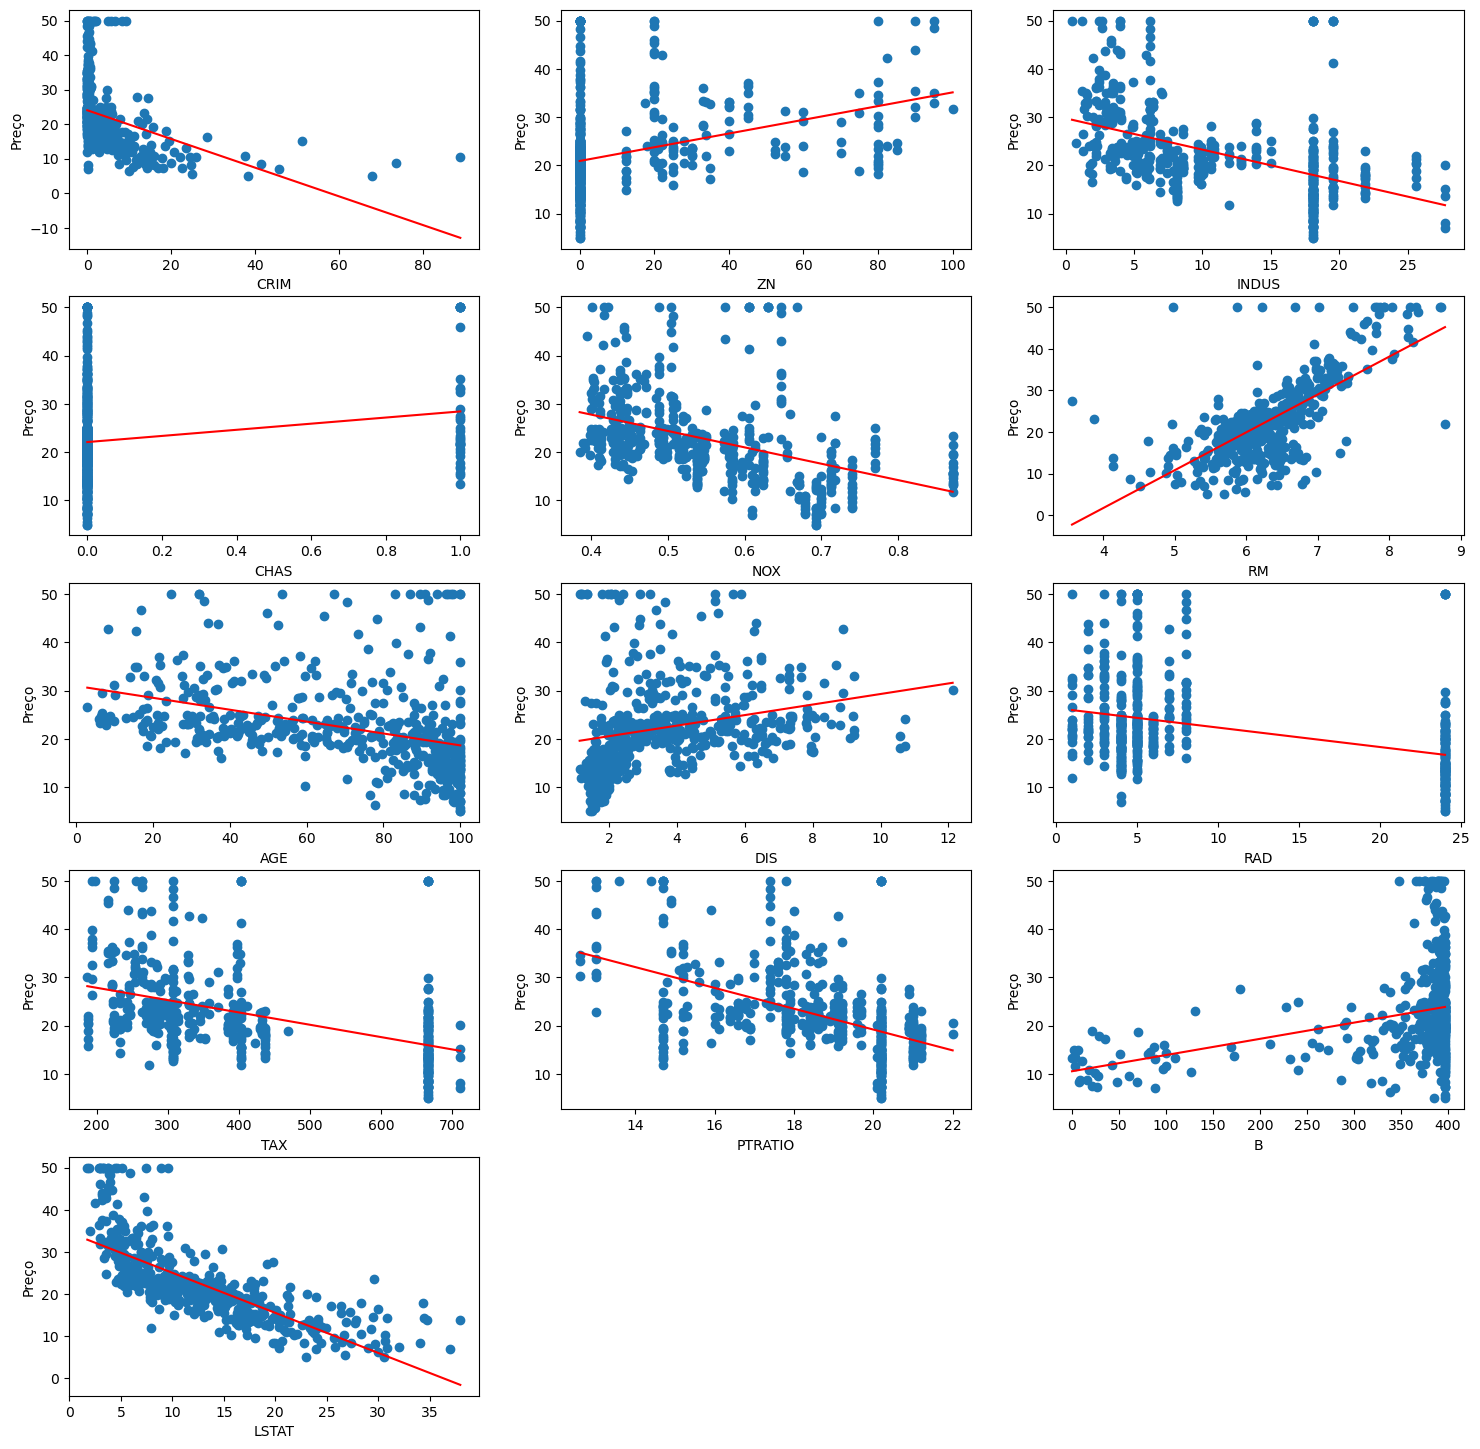

In [16]:
# Mostrando a relação linear entre recursos e preço [MEDV]

from scipy import stats
plt.figure(figsize=(18, 18))

for i, idx in enumerate(dataset.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = dataset[idx] 
    y = dataset['MEDV']
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Preço')

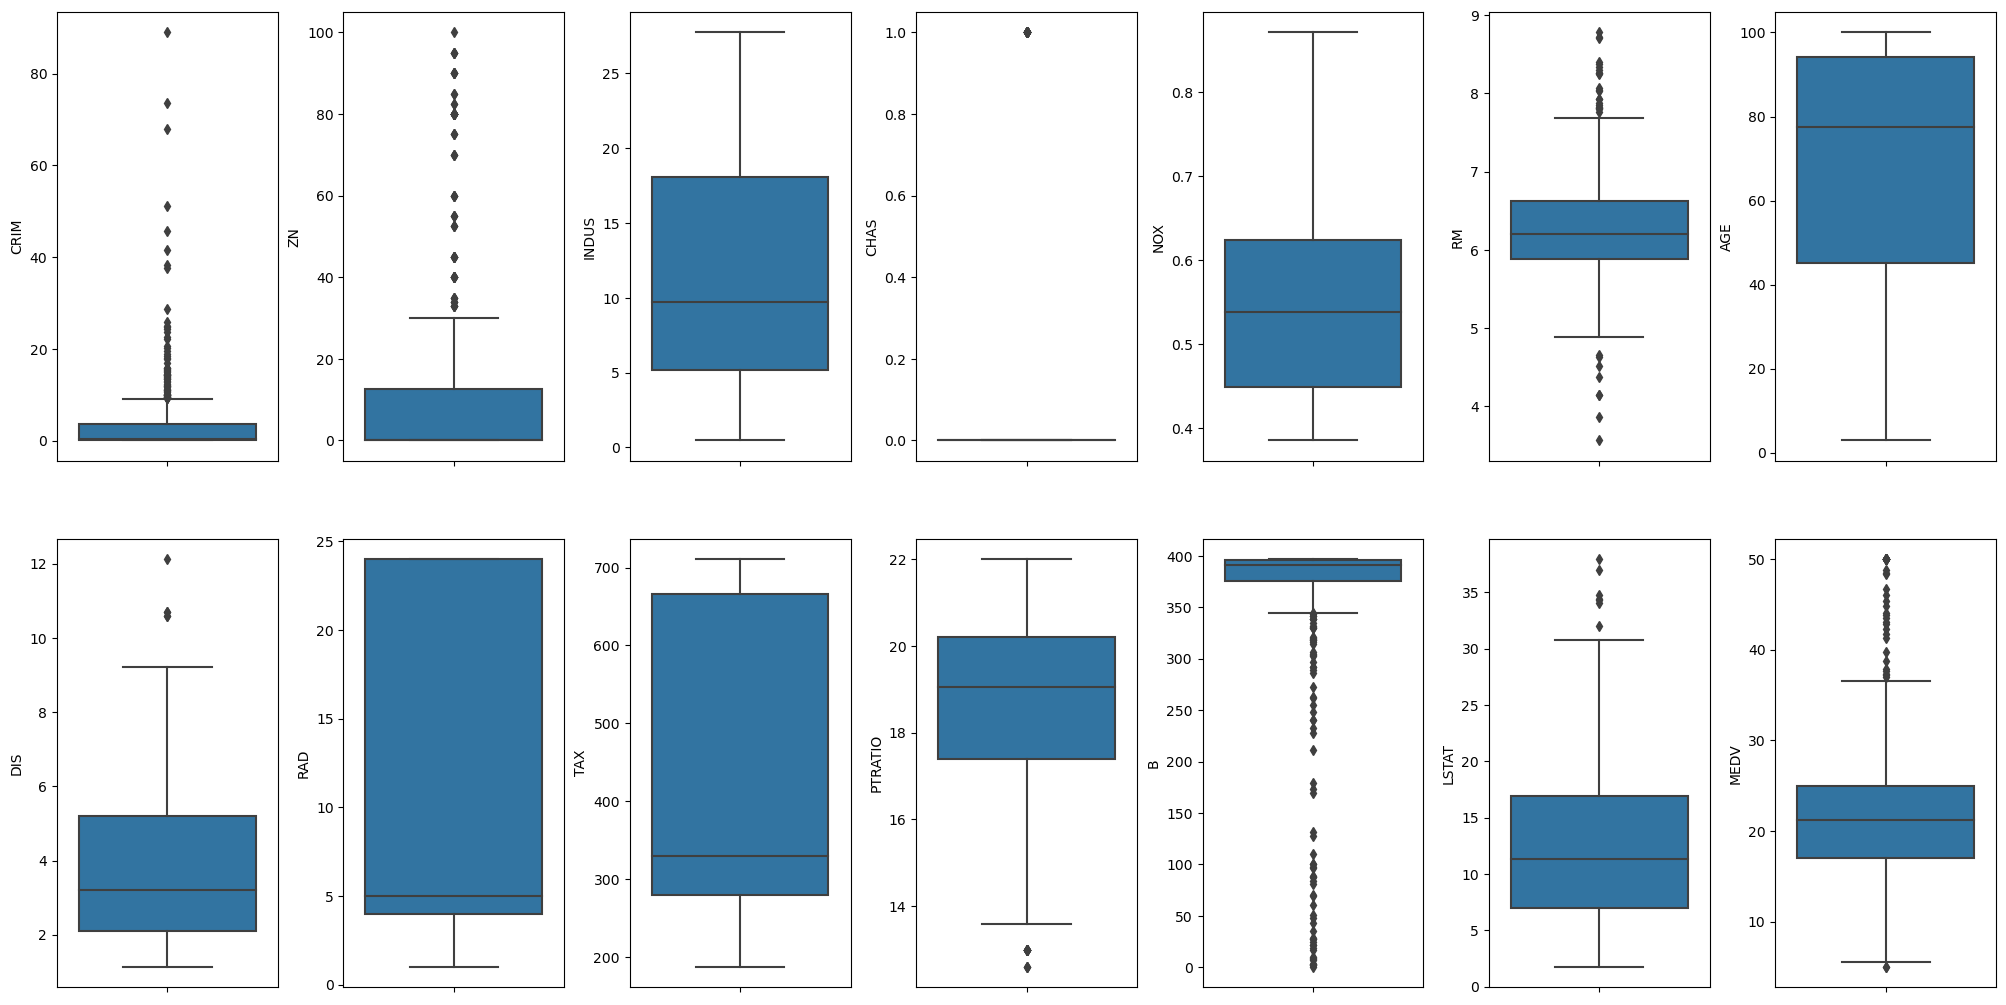

In [17]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.boxplot(y=col, data=dataset, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Apenas RM parece ter alguns outliers significativos.

In [18]:
#removendo outliers
dataset = dataset[~((dataset['RM'] >=8.5) | (dataset['RM'] < 4))]

In [19]:
# Previsão para somente um valor
modelo.predict([[7.185]])

array([30.72803225])

Este modelo preveu o valor de 30.72803225 para MEDV, porém pela tabela (terceira linha) o valor correto para MEDV é 34.7.
É importante lembrar que a previsão pode não ser exatamente igual ao valor real. A regressão linear simples é uma ferramenta poderosa para encontrar a relação entre duas variáveis, mas nem sempre é capaz de capturar todas as nuances do conjunto de dados.

Vamos criar outro modelo, agora de Regressão Linear Multípla

Vamos utilizar as colunas RM e LSTAT que vimos pelo heatmap serem as colunas com maior correlação

In [20]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
# 5 variáveis dependentes para prever MEDV
X1 = dataset[['RM', 'LSTAT']].values
X1

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [21]:
y1 = dataset.iloc[:, 13].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
#R^2
modelo2.score(X1, y1)

0.6490575452549991

In [22]:
# Criação do modelo ajustado com mais atributos (regressão linear múltipla)
#usando stats models
modelo_ajustado2 = sm.ols(formula = 'MEDV ~ RM + LSTAT', data = dataset)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     460.5
Date:                Sun, 07 May 2023   Prob (F-statistic):          5.80e-114
Time:                        01:11:26   Log-Likelihood:                -1553.0
No. Observations:                 501   AIC:                             3112.
Df Residuals:                     498   BIC:                             3125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6240      3.379     -1.665      0.097     -12.262       1.014
RM             5.6855      0.475     11.961      0.000       4.752       6.619
LSTAT         -0.6034      0.044    -13.743      0.000      -0.690      -0.517
==============================================================================
Omnibus:                      163.211   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.166
Skew:                           1.458   Prob(JB):                    1.43e-132
Kurtosis:                       7.536   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nessa regressão, a variável dependente é o valor mediano das casas (MEDV) e as variáveis independentes são o número médio de quartos por casa (RM) e a porcentagem de status inferior da população (LSTAT). O modelo explica cerca de 65% da variância na variável dependente, o que sugere que as variáveis independentes são relevantes para prever o valor mediano das casas.

O coeficiente para RM é positivo e significativo, o que sugere que, mantendo todas as outras variáveis constantes, um aumento no número médio de quartos por casa está associado a um aumento no valor mediano das casas. O coeficiente para LSTAT é negativo e significativo, o que sugere que, mantendo todas as outras variáveis constantes, um aumento na porcentagem de status inferior da população está associado a uma diminuição no valor mediano das casas. O coeficiente para o intercepto é negativo e não significativo, o que sugere que, para os valores zero de RM e LSTAT, o valor mediano das casas não é diferente de zero.

A análise de resíduos não é fornecida, mas é importante verificar se os resíduos são normalmente distribuídos, homocedásticos e independentes para validar o modelo. No entanto, com base nos resultados apresentados, pode-se concluir que o número médio de quartos por casa e a porcentagem de status inferior da população são variáveis importantes na determinação do valor mediano das casas em um bairro.

In [23]:
# Previsão de um novo registro
novo = np.array([7.185, 4.03])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([32.7943257])

Este modelo preveu o valor de 32.7943257 para MEDV, consideravelmente mais próximo dos 34.7 para MEDV da tabela original. 

É importante comentar que, ao utilizar um algoritmo de regressão linear múltipla, é possível considerar a influência de várias variáveis independentes sobre a variável dependente. Nesse caso, é possível que a inclusão de outras variáveis independentes tenha permitido um ajuste mais preciso do modelo aos dados, resultando em uma previsão mais próxima do valor real.

Isso porque a regressão linear múltipla é capaz de capturar relações de dependência mais complexas entre as variáveis independentes e a variável dependente, enquanto a regressão linear simples considera apenas uma variável independente. Dessa forma, a regressão linear múltipla pode fornecer um modelo mais completo e preciso para previsão.

No entanto, é importante lembrar que os resultados de modelos de previsão não são sempre precisos, e podem ser afetados por diversos fatores, como a qualidade dos dados utilizados no modelo e a escolha dos parâmetros do algoritmo de aprendizado de máquina. Portanto, é sempre necessário avaliar cuidadosamente os resultados obtidos e considerar diferentes abordagens para encontrar a melhor solução para um problema de previsão específico.